# Run simple lifetime model with oral daily dosing

The code below runs the lifetime model with an initial age of 10yr and bodyweight of 32kg. Dosing events are daily intakes of 1 ug/kw bw (i.e., with body weight scaling in the dosing events).

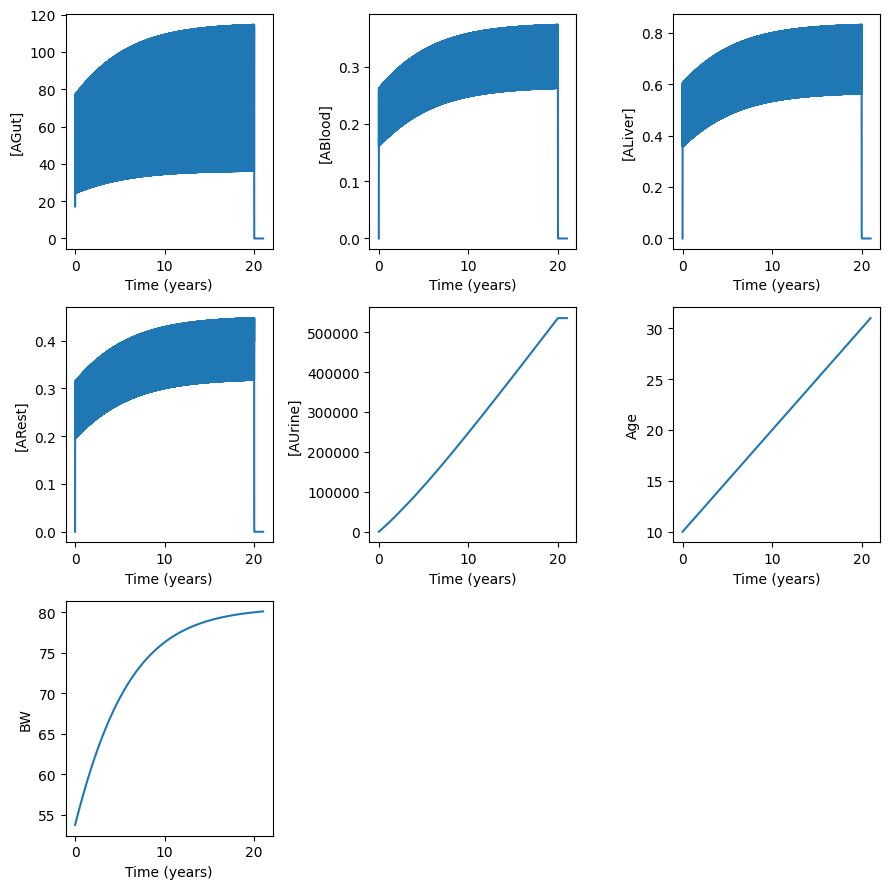

In [20]:
import math
import tellurium as te
import matplotlib.pyplot as plt

fn_ant = './simple_lifetime.ant'

# Specify the input
input_id = 'AGut'

# Dosing
daily_intake = 1
days_of_exposure = 365 * 20
days_after_exposure = 365 * 1

# Output evaluation resolution
evaluation_resolution = 1

# Load the PBPK model from the Antimony file
rr_model = te.loada(fn_ant)

# Set physiological parameters
rr_model.AgeInit = 10
rr_model.BWRef = 80
rr_model.AgeRef = 30

# Create a repeating daily oral dosing
event_id = f"oral_daily_exposure"
rr_model.addEvent(event_id, False, f"time % 24 == 0 && time < {24 * days_of_exposure}", False)
rr_model.addEventAssignment(event_id, input_id, f"{input_id} + {daily_intake} * BW", False)
rr_model.regenerateModel(True, True)

selections = rr_model.timeCourseSelections
selections.append('BW')

# Simulate the PBPK model
num_days = days_of_exposure + days_after_exposure
results = rr_model.simulate(0, 24 * num_days, evaluation_resolution * 24 * num_days + 1, selections)

# Helper function for plotting simulation results
def plotSimulationResults(res, selections, ncols=3):
    nrows = math.ceil((len(selections) - 1)/ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(3*ncols, 3*nrows))
    axes = axes.flatten()
    for ax in axes:
        ax.set(xlabel='Time (years)') 
    labels = selections
    for i in range(1, len(selections)):
        sid = selections[i]
        axes[i-1].plot(res['time'] / (24*365), res[sid])
        axes[i-1].set(ylabel=labels[i])
    for j in range(len(selections), nrows*ncols + 1):
        fig.delaxes(axes[j-1])
    fig.tight_layout()

# Plot the results
plotSimulationResults(results, selections)